In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import cv2
import os

In [2]:
_path = '/Users/cdima/Applied ML/Module13/data'

In [3]:
#1

#Train Data

X_tr, y_tr, X_ts, y_ts = [], [], [], []


import cv2
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
for label in CNAMES:
     path = _path + '/seg_train/seg_train/' + label
     for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
         X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
         y_tr += [CNAMES.index(label)]

In [4]:
#Test Data

import cv2
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
for label in CNAMES:
     path = _path + '/seg_test/seg_test/' + label
     for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
         X_ts += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
         y_ts += [CNAMES.index(label)]

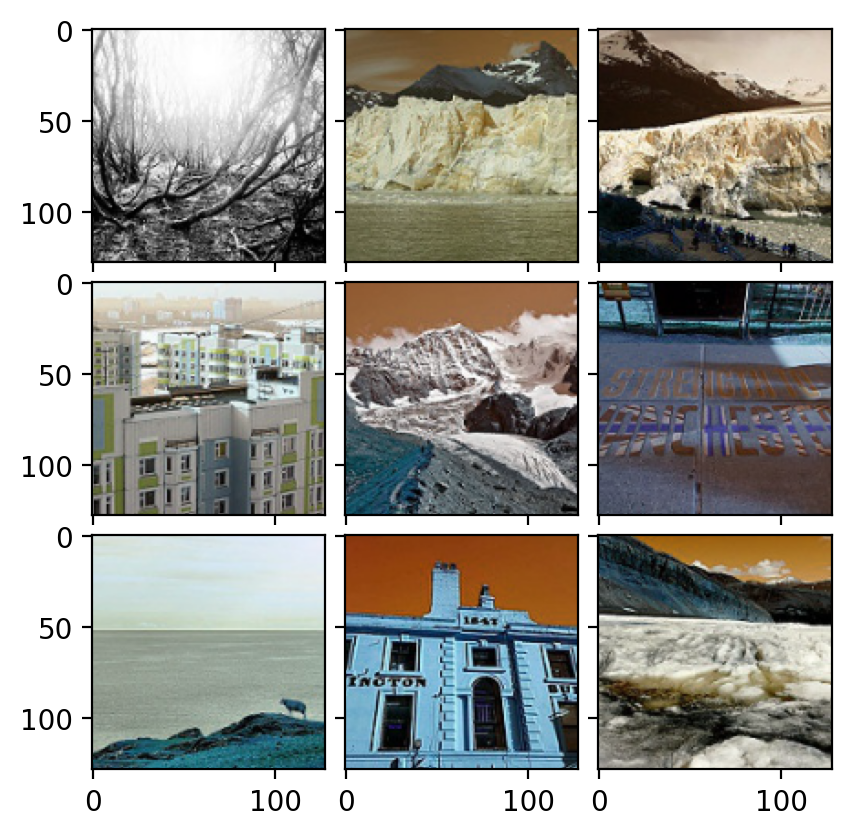

In [5]:
import random as rand
from mpl_toolkits.axes_grid1 import ImageGrid

rand_images = rand.sample(X_tr, 10)

fig = plt.figure(dpi=200)
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0.1)

for ax, im in zip(grid, rand_images):
    ax.imshow(im)

plt.show()

In [6]:
#to get the channels there are 3 color channels

len(X_ts[0][0][0])

3

In [7]:
#2 Convert to numpy array

X_train=np.array(X_tr, dtype=np.float64)
y_train= np.array(y_tr)

X_test= np.array(X_ts, dtype=np.float64)
y_test= np.array(y_ts)

In [8]:
print(X_train.shape)

(14034, 128, 128, 3)


In [9]:
#Scale Data
X_train /= 255.0
X_test /= 255.0

#Get Min and Max Sanity Check to make sure its scaled
print('Min: %.3f, Max: %.3f' % (X_train.min(), X_train.max()))

print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))

Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


In [10]:
#3 Create a Convolutional Neural Network

import tensorflow as tf

In [11]:
model= tf.keras.Sequential()

In [12]:
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), name='conv_1', activation='relu',
                               data_format='channels_last'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), name='conv_2', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))


In [13]:

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=2)

Epoch 1/2
439/439 [==============================] - 135s 304ms/step - loss: 1.0952 - accuracy: 0.5959
Epoch 2/2
439/439 [==============================] - 134s 304ms/step - loss: 0.6909 - accuracy: 0.7438


In [14]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy_score(y_test, y_pred)

94/94 [==============================] - 3s 34ms/step


0.734

In [15]:
# 4 Adding Regularization 

reg= tf.keras.regularizers.l1(l=0.01)

model2= tf.keras.Sequential()


model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), name='conv_1', activation='relu',
                               data_format='channels_last', kernel_regularizer= reg))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_1'))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), name='conv_2', activation='relu', kernel_regularizer= reg))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))


In [16]:
model2.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model2.fit(X_train,y_train,epochs=2)

Epoch 1/2
439/439 [==============================] - 147s 303ms/step - loss: 3.0063 - accuracy: 0.5975
Epoch 2/2
439/439 [==============================] - 133s 302ms/step - loss: 1.5319 - accuracy: 0.6974


In [17]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model2.predict(X_test), axis=-1)

accuracy_score(y_test, y_pred)

94/94 [==============================] - 4s 37ms/step


0.701

In [18]:
#Adding Dropout

In [19]:
model3= tf.keras.Sequential()


model3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), name='conv_1', activation='relu',
                               data_format='channels_last'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name='pool_1'))
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), name='conv_2', activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))
model3.add(tf.keras.layers.Dropout(0.2))

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model3.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))


In [20]:
model3.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model3.fit(X_train,y_train,epochs=2)

Epoch 1/2
439/439 [==============================] - 143s 316ms/step - loss: 1.0857 - accuracy: 0.5996
Epoch 2/2
439/439 [==============================] - 139s 316ms/step - loss: 0.7329 - accuracy: 0.7281


In [21]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model3.predict(X_test), axis=-1)

accuracy_score(y_test, y_pred)

94/94 [==============================] - 4s 37ms/step


0.7406666666666667